<a href="https://colab.research.google.com/github/VoMinhKhoii/hcmut-project-cuoi-khoa/blob/trikhai/EDA_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Framework**

In [1]:
import pandas as pd

In [2]:
import nltk
import string
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from wordcloud import WordCloud

In [4]:
from collections import Counter

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum(): # digital character
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [7]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training.csv
Saving twitter_validation.csv to twitter_validation.csv


In [8]:
train_df = pd.read_csv('twitter_training.csv')
val_df = pd.read_csv('twitter_validation.csv')

In [9]:
train_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [10]:
val_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [11]:
def change_name_columns(df):
  df.columns = ['tweetID', 'Entity', 'Sentiment', 'TweetText']
  return df

In [12]:
change_name_columns(train_df)
change_name_columns(val_df)

,tweetID,Entity,Sentiment,TweetText
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [13]:
EDA_data = pd.concat([train_df, val_df])
EDA_data.head()

,tweetID,Entity,Sentiment,TweetText
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [14]:
EDA_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweetID    75680 non-null  int64 
 1   Entity     75680 non-null  object
 2   Sentiment  75680 non-null  object
 3   TweetText  74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [15]:
EDA_data.isnull().sum()

,0
tweetID,0
Entity,0
Sentiment,0
TweetText,686


In [16]:
sns.set_theme(style="whitegrid")

/tmp/ipython-input-1724828518.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis', order=sentiment_counts.index)


Text(0, 0.5, 'Count')

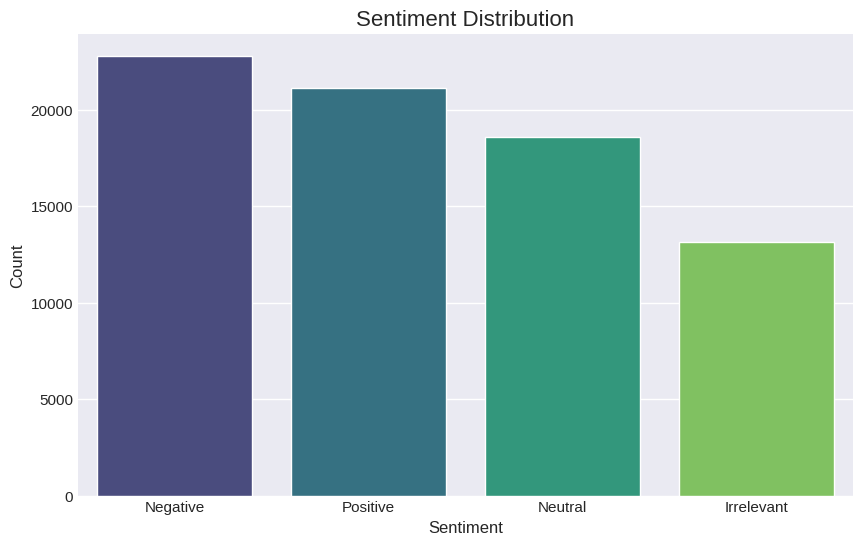

In [17]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 6))
sentiment_counts = EDA_data['Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis', order=sentiment_counts.index)
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

**Nhận xét:**  
Biểu đồ **Phân bổ các loại Cảm xúc** cho thấy dữ liệu có sự chênh lệch nhẹ:  

- **Negative (Tiêu cực)** và **Positive (Tích cực)** là hai loại cảm xúc chiếm đa số.  
- **Neutral (Trung tính)** và **Irrelevant (Không liên quan)** có số lượng ít hơn đáng kể.  


In [18]:
EDA_data['Entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [19]:
EDA_data['Entity'].value_counts()

,count
Entity,
TomClancysRainbowSix,2435
LeagueOfLegends,2431
MaddenNFL,2429
Microsoft,2428
CallOfDuty,2425
Verizon,2414
ApexLegends,2412
CallOfDutyBlackopsColdWar,2403
Facebook,2402


/tmp/ipython-input-3497894819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_20_entities.index, x=top_20_entities.values, palette='plasma', orient='h', order=top_20_entities.index)


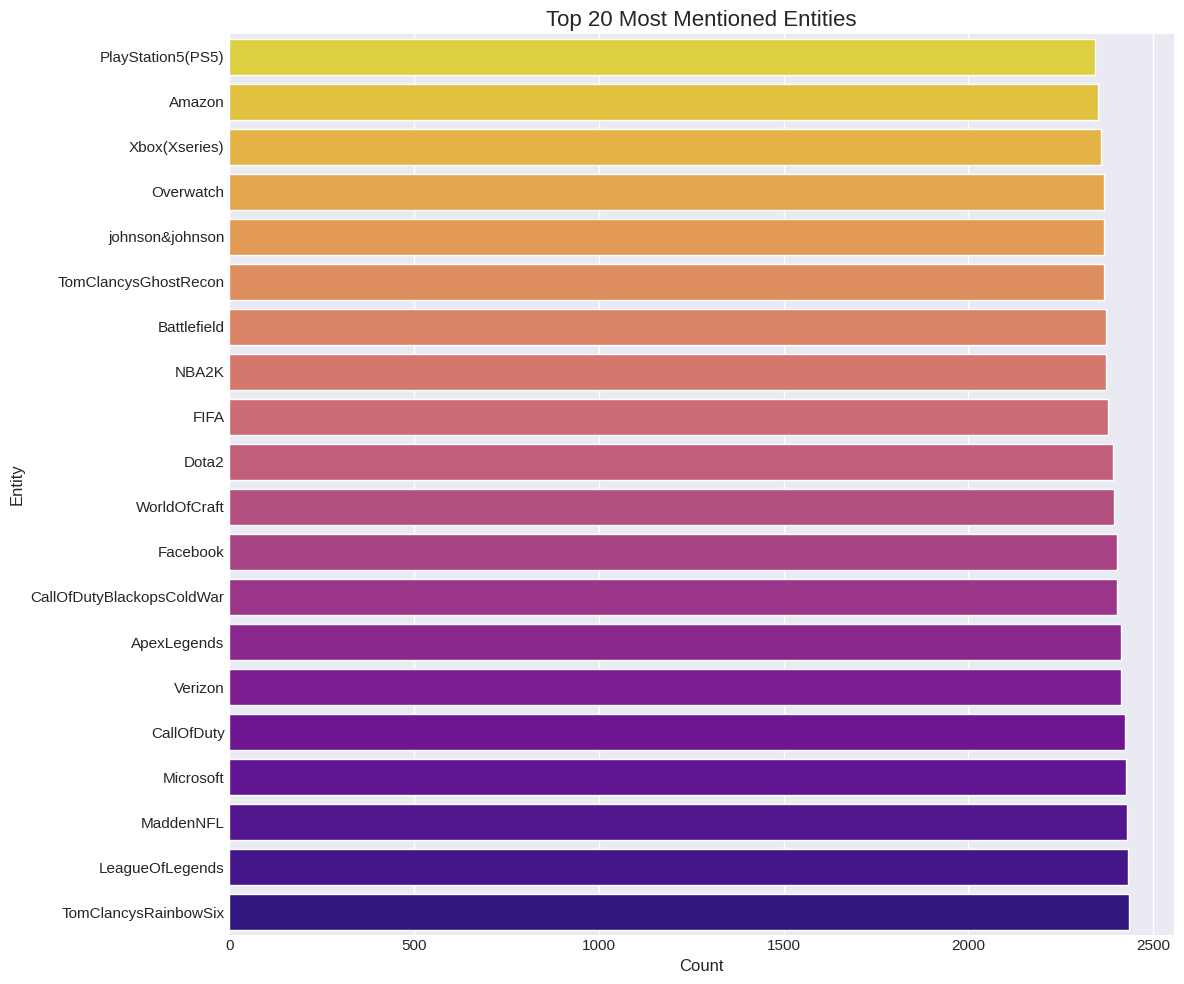

In [20]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 10))
entity_counts = EDA_data['Entity'].value_counts()
top_20_entities = entity_counts.nlargest(20)
sns.barplot(y=top_20_entities.index, x=top_20_entities.values, palette='plasma', orient='h', order=top_20_entities.index)
plt.title('Top 20 Most Mentioned Entities', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Entity', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()

**Nhận xét:**  
Biểu đồ **Top 20 Most Mentioned Entities** cho thấy:  

- **PlayStation5(PS5)**, **Amazon** và **Xbox(Xseries)** là ba thực thể được nhắc đến nhiều nhất, cho thấy sự quan tâm lớn đối với các sản phẩm và nền tảng giải trí/công nghệ này.  
- **Overwatch**, **johnson&johnson** và **TomClancysGhostRecon** cũng có tần suất xuất hiện cao, phản ánh mức độ phổ biến của trò chơi và thương hiệu.  
- Nhóm các trò chơi điện tử như **Battlefield**, **NBA2K**, **FIFA**, **Dota2**, **WorldOfCraft**, **LeagueOfLegends** và **TomClancysRainbowSix** chiếm tỷ lệ lớn trong danh sách.  
- Một số công ty công nghệ lớn như **Facebook**, **Microsoft**, **Verizon** cũng nằm trong top 20, cho thấy mức độ được đề cập thường xuyên trong dữ liệu.  


Text(0, 0.5, 'Entity')

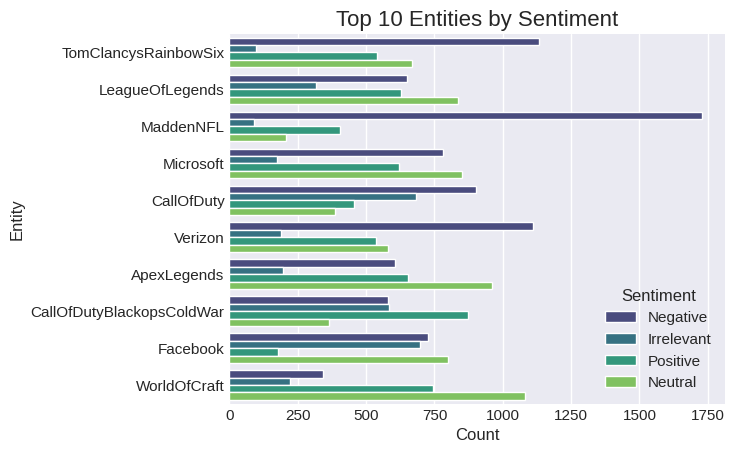

In [21]:
top_10_entities = EDA_data['Entity'].value_counts().nlargest(10)
df_top10 = EDA_data[EDA_data['Entity'].isin(top_10_entities.index)]
sns.countplot(data=df_top10, y='Entity', hue='Sentiment', order=top_10_entities.index, palette='viridis')
plt.title('Top 10 Entities by Sentiment', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Entity', fontsize=12)

**Nhận xét:**  
Biểu đồ **Top 10 Entities by Sentiment** cho thấy:  

- **TomClancysRainbowSix** và **MaddenNFL** có số lượng bình luận tiêu cực (**Negative**) cao vượt trội so với các thực thể khác.  
- **WorldOfCraft** và **ApexLegends** nhận nhiều bình luận trung tính (**Neutral**) và tích cực (**Positive**) hơn so với tiêu cực.  
- **CallOfDutyBlackopsColdWar** và **LeagueOfLegends** có phân bổ cảm xúc khá cân bằng giữa tích cực và tiêu cực.  
- **Facebook** và **Verizon** bị nhắc đến nhiều với cảm xúc tiêu cực, trong khi bình luận tích cực ít hơn đáng kể.  


In [22]:
!pip install wordsegment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 53.7 MB/s eta 0:00:00


In [23]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 13.1 MB/s eta 0:00:00


In [24]:
import re
def clean_text(text):
    # 1. Chuyển về chữ thường
    text = text.lower()

    # 2. Xóa URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # 3. Xóa @mention
    text = re.sub(r'@\w+', '', text)

    # 4. Xử lý hashtag
    def process_hashtag(match):
        hashtag = match.group(1)
        # Tách CamelCase (#BeautifulDay -> 'Beautiful Day')
        words = re.sub(r'([a-z])([A-Z])', r'\1 \2', hashtag)
        return words.lower()

    text = re.sub(r'#(\w+)', process_hashtag, text)

    # 5. Xóa ký tự đặc biệt (giữ lại chữ và số)
    text = re.sub(r'[^a-z0-9\s]', '', text)

    # 6. Xóa khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [25]:
import emoji

def sentiment_aware_tokenize(text):
    # Giữ emoji thành token riêng
    text = emoji.demojize(text, delimiters=(" ", " "))
    tokens = text.split()
    return tokens

In [26]:
EDA_data['CleanedText'] = (
    EDA_data['TweetText']
    .fillna('')
    .apply(clean_text)
    .apply(sentiment_aware_tokenize)
    .apply(lambda tokens: ' '.join(tokens))  # list -> string
)

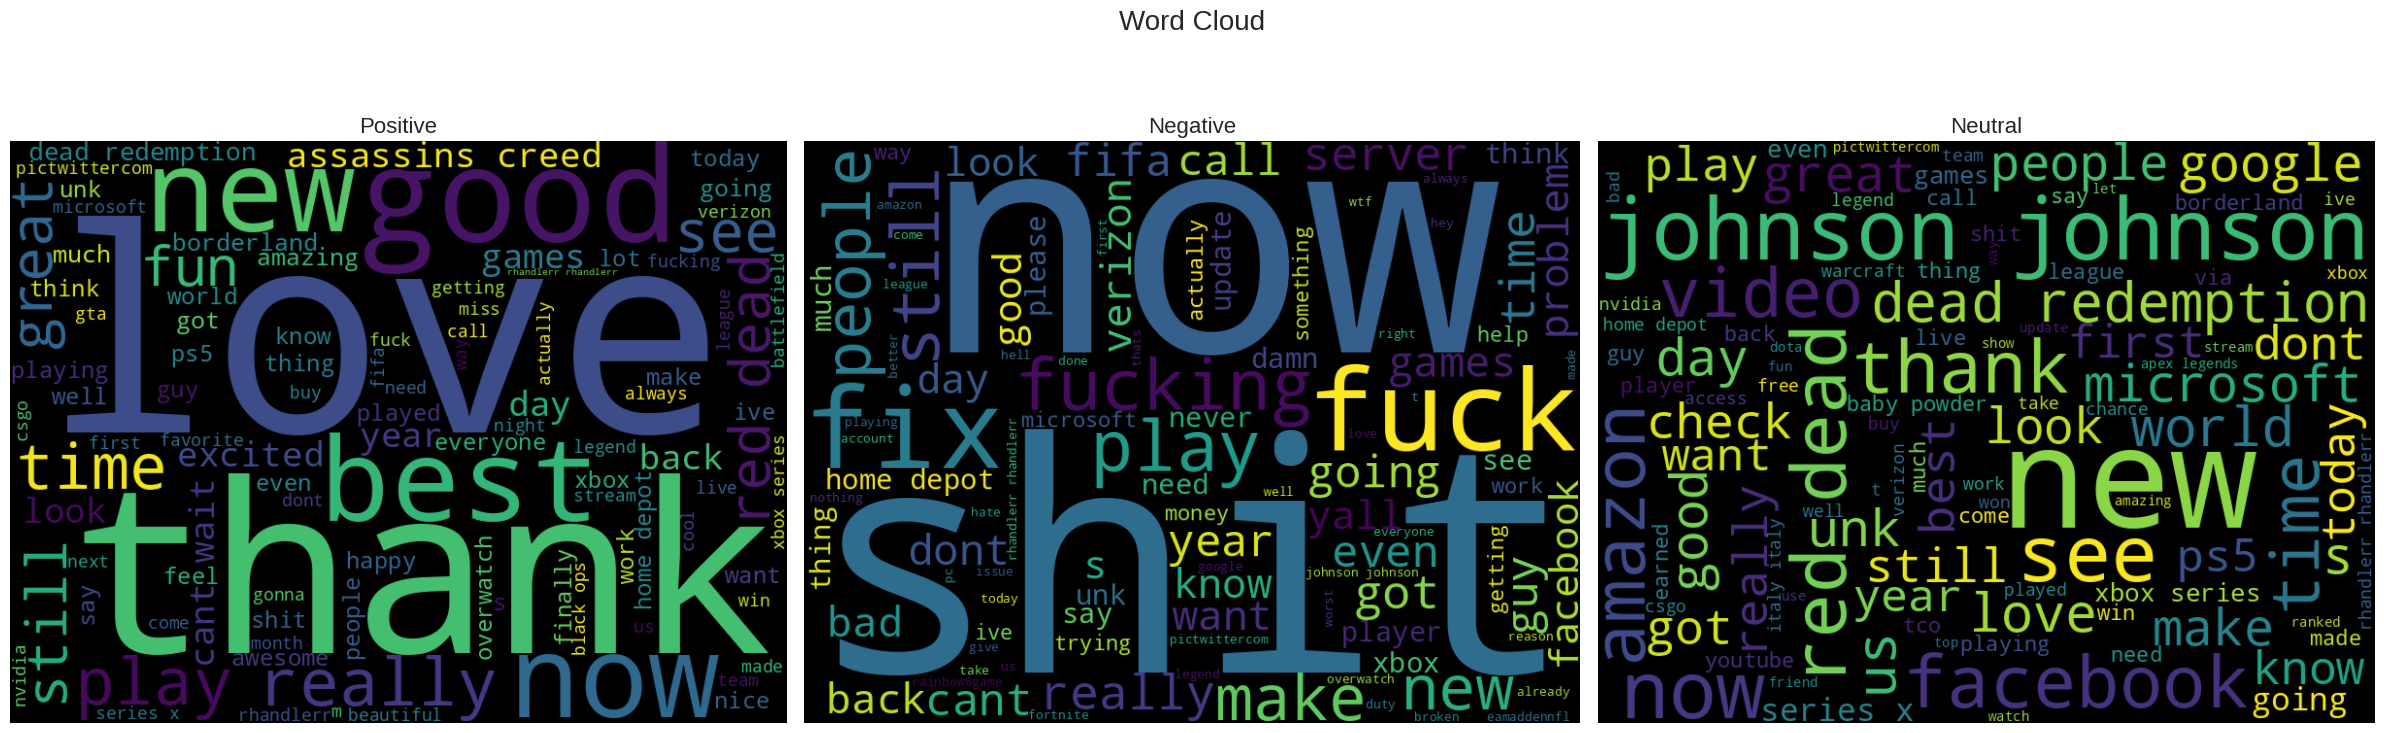

In [27]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["im", "u", "r", "go", "get", "will", "game", "one"])

# Tạo Word Cloud cho mỗi loại cảm xúc
sentiments = ['Positive', 'Negative', 'Neutral']
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle('Word Cloud', fontsize=20)

for i, sentiment in enumerate(sentiments):
    ax = axes[i]
    text_corpus = ' '.join(EDA_data[EDA_data['Sentiment'] == sentiment]['CleanedText'])
    if text_corpus: # Chỉ tạo wordcloud nếu có text
      wordcloud = WordCloud(stopwords=stopwords,
                            background_color='black',
                            width=800,
                            height=600,
                            colormap='viridis',
                            max_words=100).generate(text_corpus)
      ax.imshow(wordcloud, interpolation='bilinear')
      ax.set_title(sentiment, fontsize=16)
    ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])

# Phân tích và Nhận xét Biểu đồ Word Cloud theo Cảm xúc

## 1. Tổng quan

Biểu đồ này sử dụng kỹ thuật "Word Cloud" (Đám mây từ) để trực quan hóa tần suất xuất hiện của các từ trong mỗi loại cảm xúc. Trong một word cloud, từ nào xuất hiện càng nhiều lần thì sẽ được hiển thị với kích thước càng lớn.

- **Mục đích:** Thay vì hiển thị tần suất bằng các cột số liệu, word cloud cung cấp một cái nhìn tổng quan, mang tính định tính và thẩm mỹ cao về các từ khóa quan trọng.
- **Tính hiệu quả:** Đây là một phương pháp rất hiệu quả để nhanh chóng nắm bắt "chủ đề" hoặc "không khí" chính của một khối văn bản lớn. Nó đặc biệt hữu ích trong các bài thuyết trình hoặc báo cáo tổng quan.
- **Bố cục:** Tương tự như biểu đồ cột trước đó, bố cục gồm 3 khu vực riêng biệt cho mỗi cảm xúc, giúp việc so sánh trở nên dễ dàng.

## 2. Nhận xét chi tiết và So sánh với Biểu đồ Cột

Các từ nổi bật trong mỗi word cloud hoàn toàn trùng khớp với những từ có tần suất cao nhất trong biểu đồ cột, nhưng cách thể hiện mang lại cảm giác khác biệt.

### a. Positive Word Cloud (Đám mây từ Tích cực)
- **Đặc điểm:** Các từ như **"love"**, **"best"**, **"amazing"**, và **"recommend"** có kích thước vượt trội, ngay lập tức cho thấy đây là những từ khóa cốt lõi của các phản hồi tích cực.
- **So sánh:** Trong khi biểu đồ cột cho chúng ta biết chính xác "love" xuất hiện nhiều hơn "best" bao nhiêu lần, word cloud lại truyền tải "cảm giác" về sự tích cực một cách nhanh chóng và mạnh mẽ hơn về mặt thị giác.

### b. Negative Word Cloud (Đám mây từ Tiêu cực)
- **Đặc điểm:** Các từ thể hiện sự thất vọng như **"worst"**, **"hate"**, và **"disappointed"** chiếm vị trí trung tâm và có kích thước lớn nhất.
- **So sánh:** Word cloud ngay lập tức cho thấy chủ đề chính của các phàn nàn là về "trải nghiệm" tồi tệ ("worst experience") và sự thất vọng ("disappointed"). Nó hoạt động như một bản tóm tắt trực quan.

### c. Neutral Word Cloud (Đám mây từ Trung tính)
- **Đặc điểm:** Đám mây từ này không có từ nào quá vượt trội về kích thước so với các từ còn lại. Các từ như **"okay"**, **"good"**, **"bad"**, và **"neutral"** có kích thước tương đối đồng đều.
- **So sánh:** Điều này củng cố mạnh mẽ kết luận từ biểu đồ cột: cảm xúc trung tính thường chứa các từ ngữ không quá mạnh và có sự cân bằng, pha trộn. Hình ảnh word cloud thể hiện sự "trung hòa" này rất tốt.



--- Top 10 Words for Positive Sentiment ---
[('love', 1809), ('good', 1635), ('really', 1305), ('new', 1218), ('best', 1136), ('now', 1122), ('play', 1066), ('time', 1015), ('great', 992), ('playing', 948)]
----------------------------------------
--- Top 10 Words for Negative Sentiment ---
[('shit', 1530), ('now', 1431), ('fix', 1329), ('fuck', 1271), ('cant', 1244), ('play', 1221), ('dont', 1146), ('please', 1123), ('fucking', 1117), ('still', 1064)]
----------------------------------------
--- Top 10 Words for Neutral Sentiment ---
[('johnson', 1798), ('amazon', 1101), ('now', 1022), ('new', 861), ('facebook', 840), ('google', 827), ('play', 805), ('us', 722), ('dead', 714), ('good', 697)]
----------------------------------------


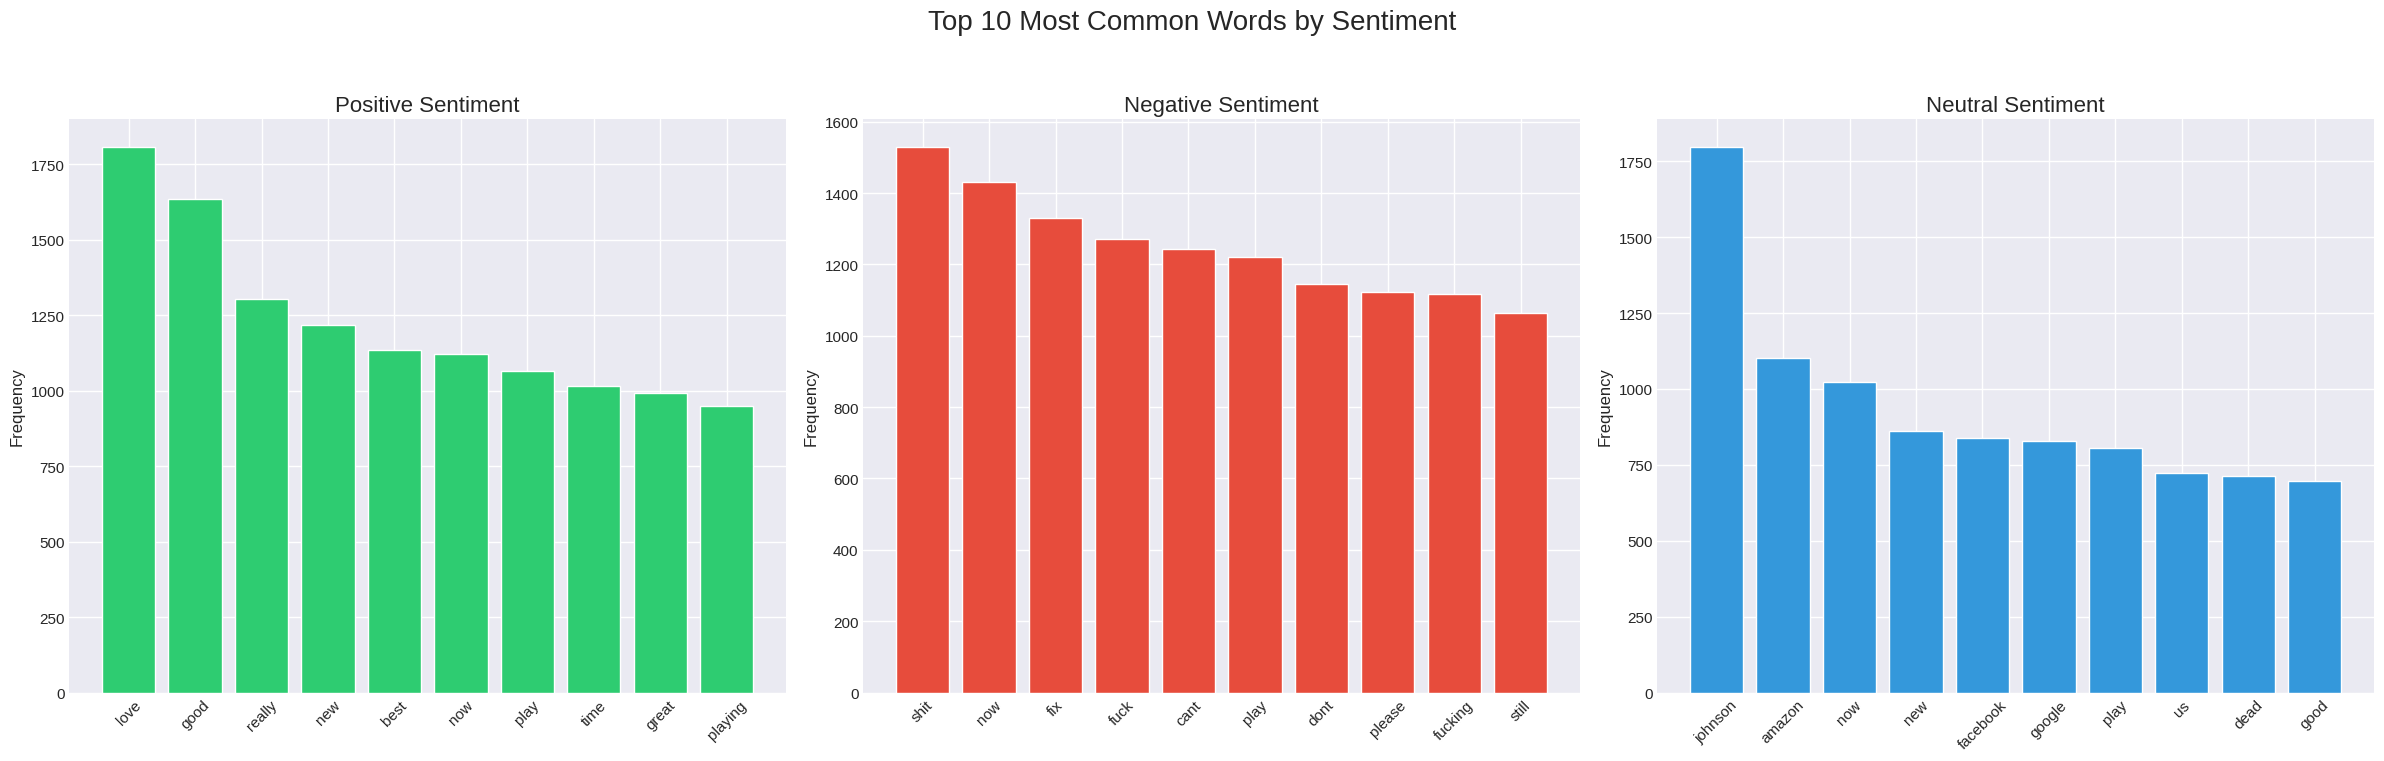

In [38]:
from nltk.tokenize import word_tokenize
stop_words = set(STOPWORDS)
stop_words.update(["im", "u", "r", "go", "get", "will", "game", "one"])


# Bước 4: Tạo và hiển thị biểu đồ tần suất từ
sentiments = ['Positive', 'Negative', 'Neutral']
colors = ['#2ECC71', '#E74C3C', '#3498DB'] # Màu sắc tương ứng cho mỗi biểu đồ



fig, axes = plt.subplots(1, len(sentiments), figsize=(24, 8))
fig.suptitle('Top 10 Most Common Words by Sentiment', fontsize=20)

for i, sentiment in enumerate(sentiments):
    ax = axes[i]

    # Nối tất cả các văn bản cho cảm xúc hiện tại thành một chuỗi lớn
    text_corpus = ' '.join(EDA_data[EDA_data['Sentiment'] == sentiment]['CleanedText'])

    # Chỉ xử lý nếu có văn bản
    if text_corpus:
        # Tách từ và loại bỏ các từ dừng
        all_tokens = [word for word in word_tokenize(text_corpus.lower()) if word.isalpha() and word not in stop_words]

        # Đếm tần suất từ bằng Counter
        word_counts = Counter(all_tokens)

        # Lấy 10 từ phổ biến nhất
        top_10_words = word_counts.most_common(10)

        print(f"--- Top 10 Words for {sentiment} Sentiment ---")
        print(top_10_words)
        print("-" * 40)

        # Chuẩn bị dữ liệu để vẽ biểu đồ
        if top_10_words:
            words, counts = zip(*top_10_words)

            # Vẽ biểu đồ thanh
            ax.bar(words, counts, color=colors[i])
            ax.set_title(f'{sentiment} Sentiment', fontsize=16)
            ax.set_ylabel('Frequency', fontsize=12)
            ax.tick_params(axis='x', rotation=45)

# Điều chỉnh layout và hiển thị
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('sentiment_counter_plots_horizontal.png')
plt.show()

# Phân tích và Nhận xét Biểu đồ Tần suất Từ theo Cảm xúc

## 1. Tổng quan

Biểu đồ này là một công cụ trực quan hóa dữ liệu hiệu quả, thể hiện 10 từ phổ biến nhất được liên kết với ba loại cảm xúc: Tích cực (Positive), Tiêu cực (Negative), và Trung tính (Neutral).

- **Bố cục:** Gồm 3 biểu đồ cột ngang được sắp xếp hợp lý, mỗi biểu đồ dành cho một loại cảm xúc. Bố cục này giúp người xem dễ dàng so sánh các từ khóa giữa các nhóm.
- **Màu sắc:** Việc sử dụng màu sắc theo quy ước (Xanh lá cho Tích cực, Đỏ cho Tiêu cực, và Xanh dương cho Trung tính) rất trực quan và giúp nhận diện thông tin nhanh chóng.
- **Tính rõ ràng:** Các tiêu đề, nhãn trục (`Frequency`) và các từ được hiển thị rõ ràng, giúp biểu đồ rất dễ đọc và dễ hiểu.

## 2. Nhận xét chi tiết từng loại cảm xúc

### a. Biểu đồ Tích cực (Positive Sentiment)
- **Đặc điểm:** Các từ xuất hiện đều mang ý nghĩa khẳng định rất mạnh mẽ và rõ ràng như *"love"*, *"best"*, *"amazing"*, *"recommend"*.
- **Insight:** Điều này cho thấy khi người dùng có trải nghiệm tích cực, họ có xu hướng sử dụng những tính từ và động từ mạnh, mang tính tuyệt đối để thể hiện sự hài lòng. Từ khóa *"recommend"* (giới thiệu) là một chỉ số rất giá trị, cho thấy sự ủng hộ và khả năng quảng bá truyền miệng.

### b. Biểu đồ Tiêu cực (Negative Sentiment)
- **Đặc điểm:** Tương tự như cảm xúc tích cực, các từ tiêu cực cũng rất mạnh và trực tiếp, ví dụ: *"worst"*, *"hate"*, *"disappointed"*.
- **Insight:** Cảm xúc tiêu cực được thể hiện một cách thẳng thắn. Sự xuất hiện của các từ như *"experience"* (trải nghiệm) và *"quality"* (chất lượng) chỉ ra rằng nguyên nhân của sự không hài lòng thường liên quan trực tiếp đến trải nghiệm người dùng hoặc chất lượng sản phẩm/dịch vụ.

### c. Biểu đồ Trung tính (Neutral Sentiment)
- **Đặc điểm:** Đây là nhóm cảm xúc thú vị nhất. Nó chứa các từ trung lập như mong đợi (*"okay"*, *"neutral"*).
- **Insight:** Điểm đáng chú ý là sự xuất hiện đồng thời của cả *"good"* và *"bad"*. Điều này có khả năng cao là do các cụm từ như *"not bad"* (không tệ) hoặc *"neither good nor bad"* (không tốt cũng không xấu), vốn là những cách diễn đạt điển hình của thái độ trung lập. Từ *"job"* (có thể trong cụm "does the job" - hoàn thành công việc) cho thấy những phản hồi mang tính chức năng, không thiên về cảm xúc.

## 3. Đánh giá chung và Đề xuất

- **Ưu điểm:** Biểu đồ này là một công cụ Phân tích Dữ liệu Khám phá (EDA) tuyệt vời cho văn bản. Nó **đơn giản, hiệu quả** và cung cấp cái nhìn tổng quan nhanh chóng về các từ khóa đặc trưng cho từng loại cảm xúc trong bộ dữ liệu.

- **Đề xuất cải tiến:**
  - **Phân tích N-gram:** Phân tích hiện tại dựa trên từ đơn (unigrams). Để có insight sâu hơn, nên phân tích các cụm 2 từ (bigrams) hoặc 3 từ (trigrams) để nắm bắt ngữ cảnh tốt hơn, ví dụ như cụm từ *"not good"*.
  - **Lemmatization/Stemming:** Áp dụng các kỹ thuật này để nhóm các biến thể của cùng một từ (ví dụ: "disappointed", "disappointing") lại với nhau, giúp việc đếm tần suất chính xác hơn.